In [2]:
import fixr
import lookyloo
from lookyloo.core import get_matching_paths
import pathlib
import datetime
import numpy as np
from astropy.io import fits
from importlib import reload
from matplotlib import pyplot as plt

In [3]:
import spark_xrif as sx
dark_dir = '/opt/MagAOX/calib/camwfs-dark/'
reload(sx)

<module 'spark_xrif' from '/home/eden/code/testing/spark_xrif.py'>

In [4]:
def gram_schmidt_columns(X):
    Q, R = np.linalg.qr(X)
    return Q

## 24Ab tets after sone cacao plumbing updates

In [8]:
# looking at the offset tweeter speck frames 
lab_dark = dark_dir + 'camwfs-dark_bin2_2000.000000_10.000000_-45.000000__T20240330051127513106835.fits'
sky_dark = dark_dir + 'camwfs-dark_bin2_1800.000000_600.000000_-45.000000__T20240324234326026219038.fits'

sx_test_0 = sx.SparkXrif('speckles_delay_000_2khz_2lamD', 'speckles_delay_000_2khz_2lamD', sky_dark, lab_dark, sx.glob_dir_calib, sx.glob_mask, sx.glob_ref)
sx_test_1 = sx.SparkXrif('speckles_delay_365_2khz_2lamD', 'speckles_delay_365_2khz_2lamD', sky_dark, lab_dark, sx.glob_dir_calib, sx.glob_mask, sx.glob_ref)
sx_test_2 = sx.SparkXrif('speckles_delay_380_2khz_2lamD', 'speckles_delay_380_2khz_2lamD', sky_dark, lab_dark, sx.glob_dir_calib, sx.glob_mask, sx.glob_ref)

Number of DATA files:  207872
Number of REF files:  207872
GENERATING REFERENCE
PULLING 1024 FILES
FILE no 3, n_start 0, n 1024, n_offset 0
XRIF index 0, no of files 3, len list 406
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7619622 bytes
  ratio:              0.517

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:       20480 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7619285 bytes
  ratio:              0.517

xrif compres

### normal reduciton

In [9]:
# checking the defaults
x_lab_data_0 = np.array(sx_test_0.labref_norm)
X_lab_M_0 = x_lab_data_0.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

# checking the lab reference
x_lab_data_1 = np.array(sx_test_1.labref_norm)
X_lab_M_1 = x_lab_data_1.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

# checking the lab reference for other
x_lab_data_2 = np.array(sx_test_2.labref_norm)
X_lab_M_2 = x_lab_data_2.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

In [21]:
# now more othogonalizing
X_lab_Q_0 = gram_schmidt_columns(X_lab_M_0.T)
X_lab_Q_1 = gram_schmidt_columns(X_lab_M_1.T)
X_lab_Q_2 = gram_schmidt_columns(X_lab_M_2.T)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

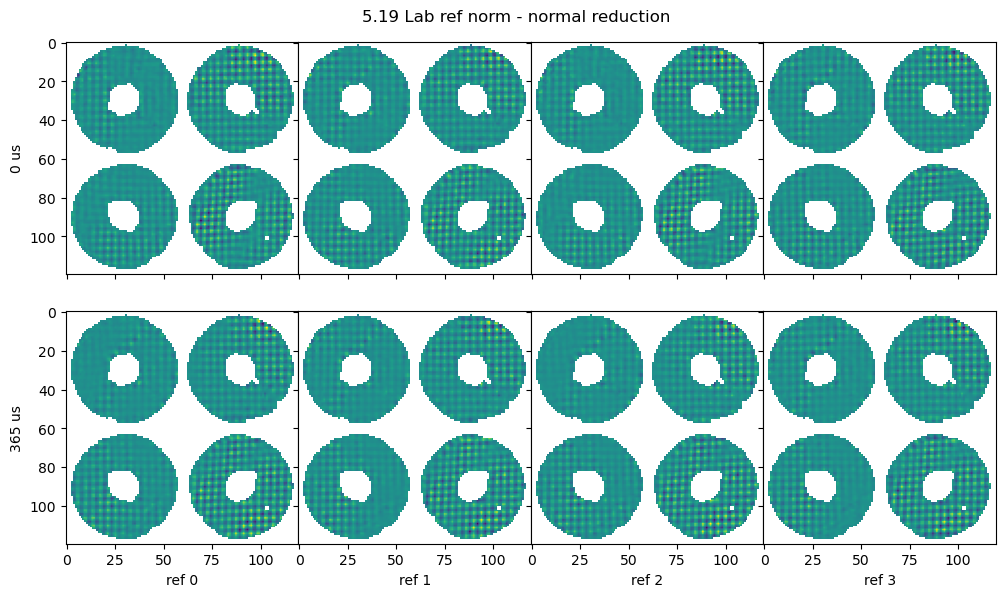

In [20]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,7), facecolor='white', sharey=True, sharex=True)
fig.subplots_adjust(wspace=0, hspace=0)

mask = sx_test_1.mask_nan

plt.suptitle("5.19 Lab ref norm - normal reduction", y=0.9)
axs[0,0].set_ylabel("0 us")
axs[1,0].set_ylabel("365 us")

for e in range(4):
    axs[0,e].imshow(X_lab_M_0[e].reshape(120,120)*mask, label = f'ref {e}', vmax = np.max(X_lab_M_0), vmin = np.min(X_lab_M_0))

for e in range(4):
    axs[1,e].imshow(X_lab_M_1[e].reshape(120,120)*mask, label = f'ref {e}', vmax = np.max(X_lab_M_0), vmin = np.min(X_lab_M_0))
    axs[1,e].set_xlabel(f"ref {e}")

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

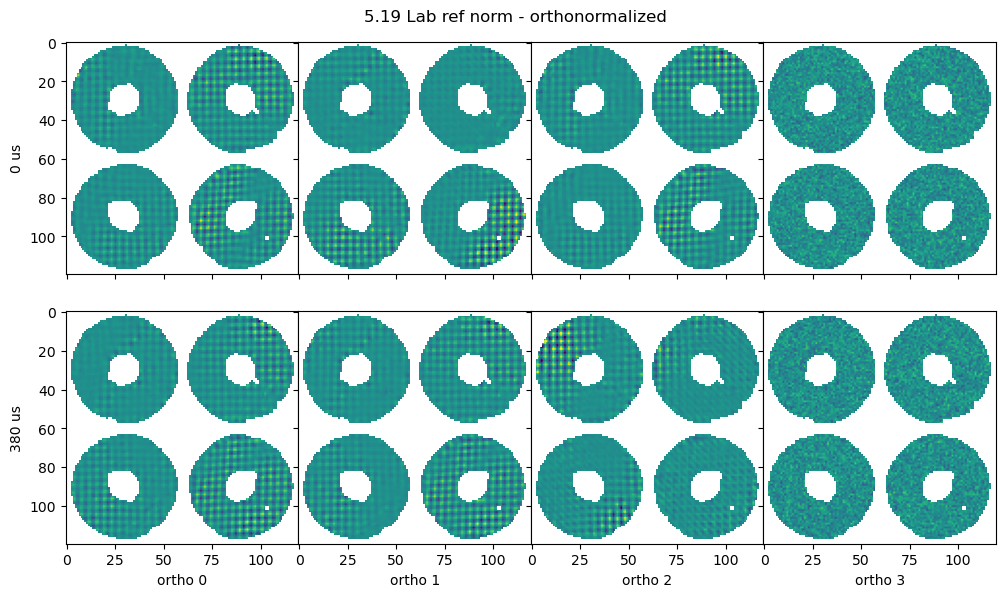

In [23]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,7), facecolor='white',  sharey=True, sharex=True)
fig.subplots_adjust(wspace=0, hspace=0)

mask = sx_test_1.mask_nan

plt.suptitle("5.19 Lab ref norm - orthonormalized", y=0.9)
axs[0,0].set_ylabel("0 us")
axs[1,0].set_ylabel("380 us")

for e in range(4):
    axs[0,e].imshow(X_lab_Q_0[:, e].reshape(120,120)*mask, vmax = np.max(X_lab_M_0), vmin = np.min(X_lab_M_0))

for e in range(4):
    axs[1,e].imshow(X_lab_Q_2[:, e].reshape(120,120)*mask, vmax = np.max(X_lab_M_0), vmin = np.min(X_lab_M_0))
    axs[1,e].set_xlabel(f"ortho {e}")

plt.plot

### Rollsub reduction

In [24]:
# checking the lab reference
x_lab_rollsub_0 = np.array(sx_test_0.labref_rollsub)
X_lab_rs_M_0 = x_lab_rollsub_0.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

x_lab_rollsub_1 = np.array(sx_test_1.labref_rollsub)
X_lab_rs_M_1 = x_lab_rollsub_1.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

x_lab_rollsub_2 = np.array(sx_test_2.labref_rollsub)
X_lab_rs_M_2 = x_lab_rollsub_2.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

In [25]:
# now more othogonalizing
X_lab_rs_Q_0 = gram_schmidt_columns(X_lab_rs_M_0.T)
X_lab_rs_Q_1 = gram_schmidt_columns(X_lab_rs_M_1.T)
X_lab_rs_Q_2 = gram_schmidt_columns(X_lab_rs_M_2.T)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

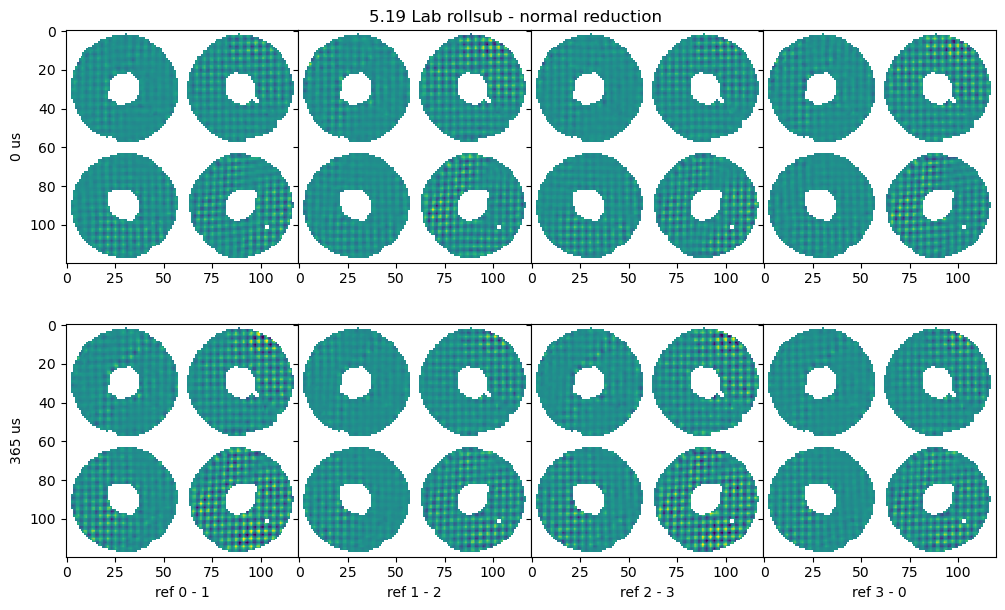

In [28]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,7), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

plt.suptitle("5.19 Lab rollsub - normal reduction", y=0.9)
axs[0,0].set_ylabel("0 us")
axs[1,0].set_ylabel("365 us")

mask = sx_test_1.mask_nan

for e in range(4):
    axs[0,e].imshow(X_lab_rs_M_0[e].reshape(120,120)*mask,  vmax = np.max(X_lab_rs_M_0), vmin = np.min(X_lab_rs_M_0))

for e in range(4):
    axs[1,e].imshow(X_lab_rs_M_1[e].reshape(120,120)*mask,  vmax = np.max(X_lab_rs_M_0), vmin = np.min(X_lab_rs_M_0))
    axs[1,e].set_xlabel(f"ref {e} - {(e+1)%4}")

plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

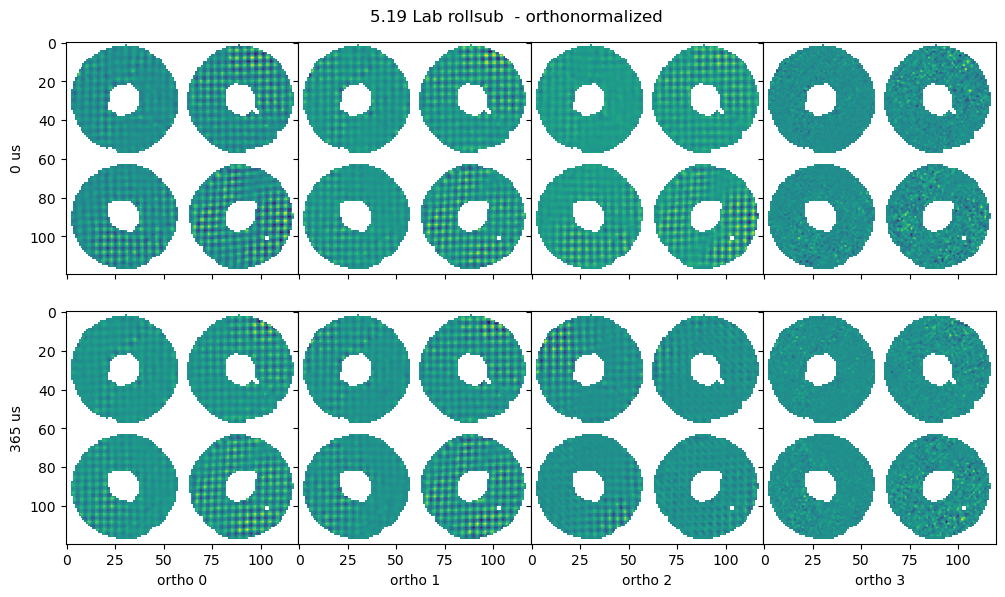

In [32]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,7), facecolor='white',  sharey=True, sharex=True)
fig.subplots_adjust(wspace=0, hspace=0)

mask = sx_test_1.mask_nan

plt.suptitle("5.19 Lab rollsub  - orthonormalized", y=0.9)
axs[0,0].set_ylabel("0 us")
axs[1,0].set_ylabel("365 us")

for e in range(4):
    axs[0,e].imshow(X_lab_rs_Q_0[:, e].reshape(120,120)*mask)

for e in range(4):
    axs[1,e].imshow(X_lab_rs_Q_1[:, e].reshape(120,120)*mask)
    axs[1,e].set_xlabel(f"ortho {e}")

plt.plot

## 24Ab tests

In [5]:
# looking at the offset tweeter speck frames 
lab_dark = dark_dir + 'camwfs-dark_bin2_2000.000000_10.000000_-45.000000__T20240330051127513106835.fits'
sky_dark = dark_dir + 'camwfs-dark_bin2_1800.000000_600.000000_-45.000000__T20240324234326026219038.fits'

sx_test_1 = sx.SparkXrif('speckles_400us_delay_wfs_trigger', 'speckles_400us_delay_wfs_trigger', sky_dark, lab_dark, sx.glob_dir_calib, sx.glob_mask, sx.glob_ref)
sx_test_2 = sx.SparkXrif('speckles_150us_delay_wfs_trigger', 'speckles_150us_delay_wfs_trigger', sky_dark, lab_dark, sx.glob_dir_calib, sx.glob_mask, sx.glob_ref)

Number of DATA files:  54272
Number of REF files:  54272
GENERATING REFERENCE
PULLING 1024 FILES
FILE no 3, n_start 0, n 1024, n_offset 0
XRIF index 0, no of files 3, len list 106
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7552854 bytes
  ratio:              0.512

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:       20480 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7551579 bytes
  ratio:              0.512

xrif compressi

In [6]:
# checking the lab reference
x_lab_data_1 = np.array(sx_test_1.labref_norm)
X_lab_M_1 = x_lab_data_1.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

# checking the lab reference for other
x_lab_data_2 = np.array(sx_test_2.labref_norm)
X_lab_M_2 = x_lab_data_2.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

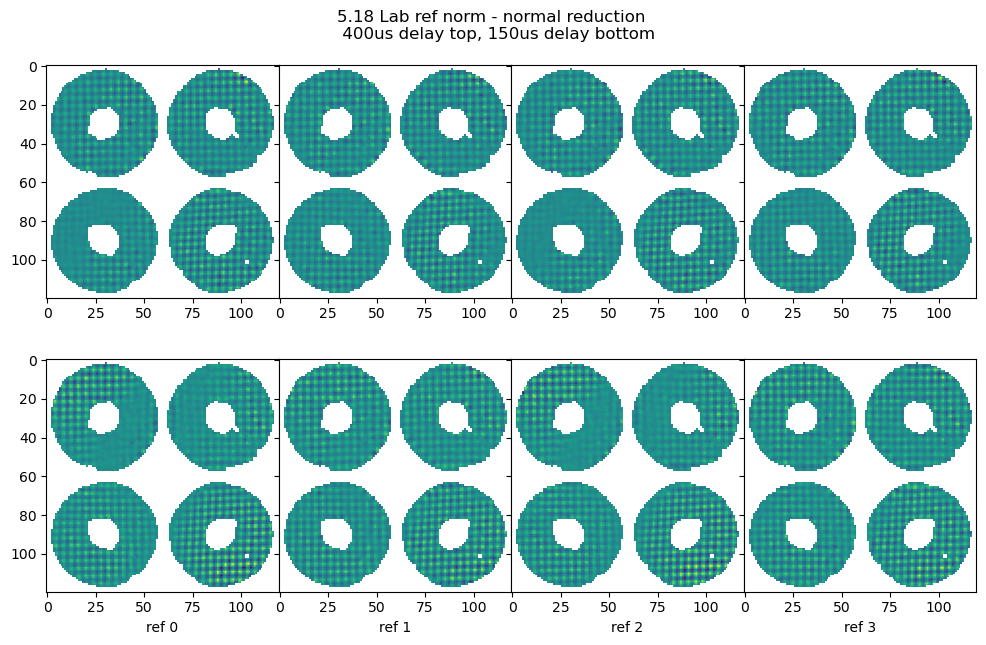

In [8]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,7), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test_1.mask_nan

for e in range(4):
    axs[0,e].imshow(X_lab_M_1[e].reshape(120,120)*mask, label = f'ref {e}', vmax = np.max(X_lab_M_1), vmin = np.min(X_lab_M_1))

for e in range(4):
    axs[1,e].imshow(X_lab_M_2[e].reshape(120,120)*mask, label = f'ref {e}', vmax = np.max(X_lab_M_2), vmin = np.min(X_lab_M_2))
    axs[1,e].set_xlabel(f"ref {e}")

plt.suptitle("5.18 Lab ref norm - normal reduction  \n 400us delay top, 150us delay bottom", y=0.95)

plt.plot

[]

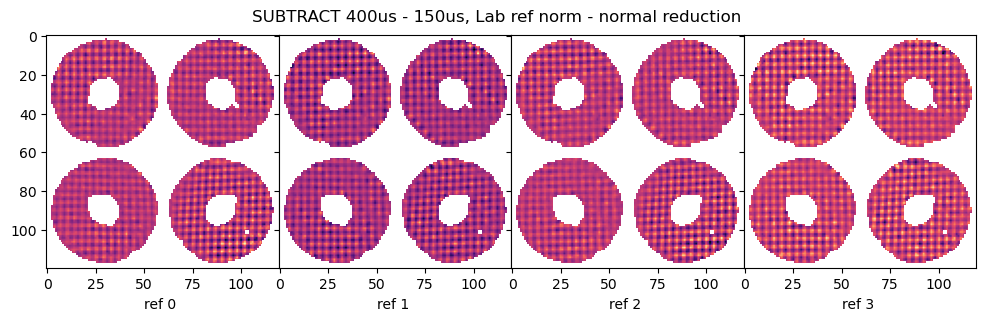

In [9]:
# default subtracts
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test_1.mask_nan

for e in range(4):
    sub_mat = X_lab_M_1[e] - X_lab_M_2[e]
    axs[e].imshow(sub_mat.reshape(120,120)*mask, label = f'ref {e}', vmax = np.max(sub_mat), vmin = np.min(sub_mat), cmap = 'magma')
    axs[e].set_xlabel(f"ref {e} ")

plt.suptitle("SUBTRACT 400us - 150us, Lab ref norm - normal reduction", y=0.85)
plt.plot()

In [10]:
# now more othogonalizing
X_lab_Q_1 = gram_schmidt_columns(X_lab_M_1.T)
X_lab_Q_2 = gram_schmidt_columns(X_lab_M_2.T)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

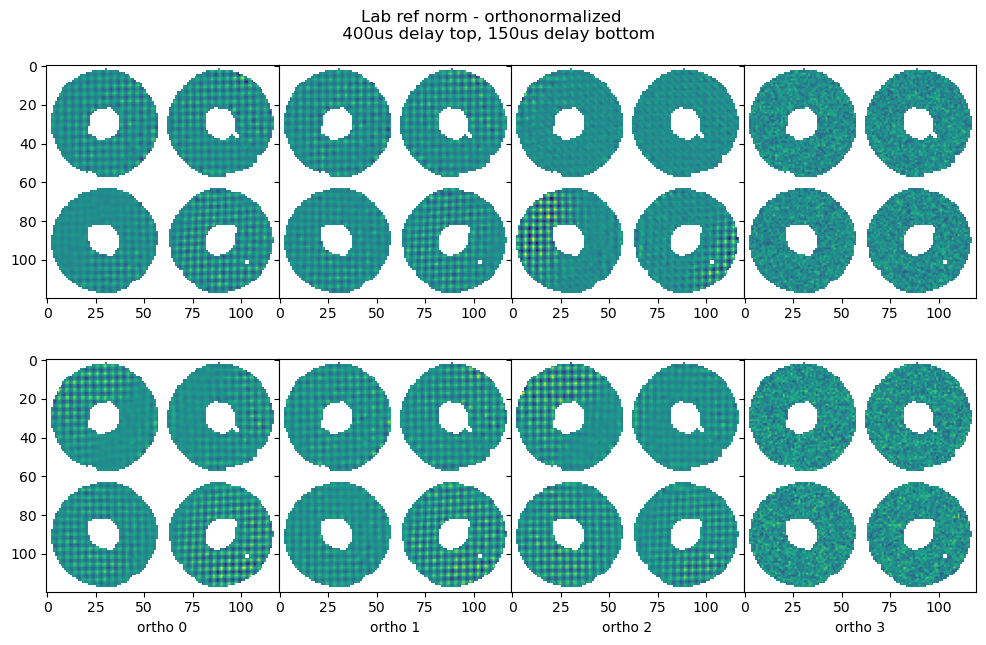

In [11]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,7), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test_1.mask_nan

for e in range(4):
    axs[0,e].imshow(X_lab_Q_1[:, e].reshape(120,120)*mask, vmax = np.max(X_lab_M_1), vmin = np.min(X_lab_M_1))

for e in range(4):
    axs[1,e].imshow(X_lab_Q_2[:, e].reshape(120,120)*mask, vmax = np.max(X_lab_M_2), vmin = np.min(X_lab_M_2))
    axs[1,e].set_xlabel(f"ortho {e}")

plt.suptitle("Lab ref norm - orthonormalized  \n 400us delay top, 150us delay bottom", y=0.95)

plt.plot

[]

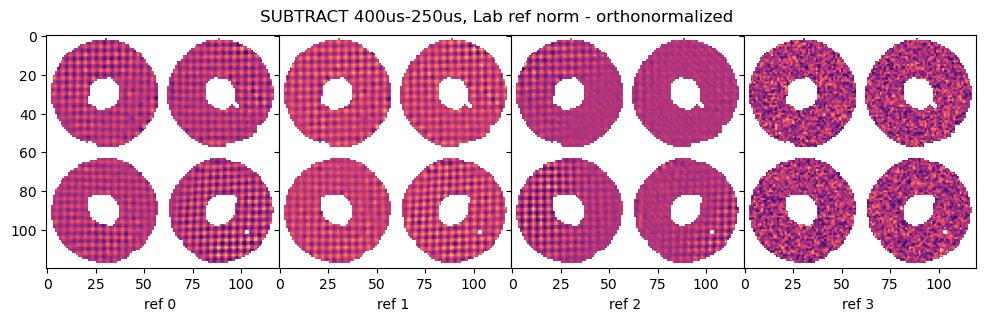

In [12]:
# orthogonalized subtracts
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test_1.mask_nan

for e in range(4):
    sub_mat = X_lab_Q_1[:, e] -X_lab_Q_2[:, e]
    axs[e].imshow(sub_mat.reshape(120,120)*mask, label = f'ref {e}', vmax = np.max(sub_mat), vmin = np.min(sub_mat), cmap = 'magma')
    axs[e].set_xlabel(f"ref {e} ")

plt.suptitle("SUBTRACT 400us-250us, Lab ref norm - orthonormalized", y=0.85)
plt.plot()

### Subtraction tests - rollsub

In [13]:
# checking the lab reference
x_lab_rollsub_1 = np.array(sx_test_1.labref_rollsub)
X_lab_rs_M_1 = x_lab_rollsub_1.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

# checking the lab reference for other
x_lab_rollsub_2 = np.array(sx_test_2.labref_rollsub)
X_lab_rs_M_2 = x_lab_rollsub_2.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

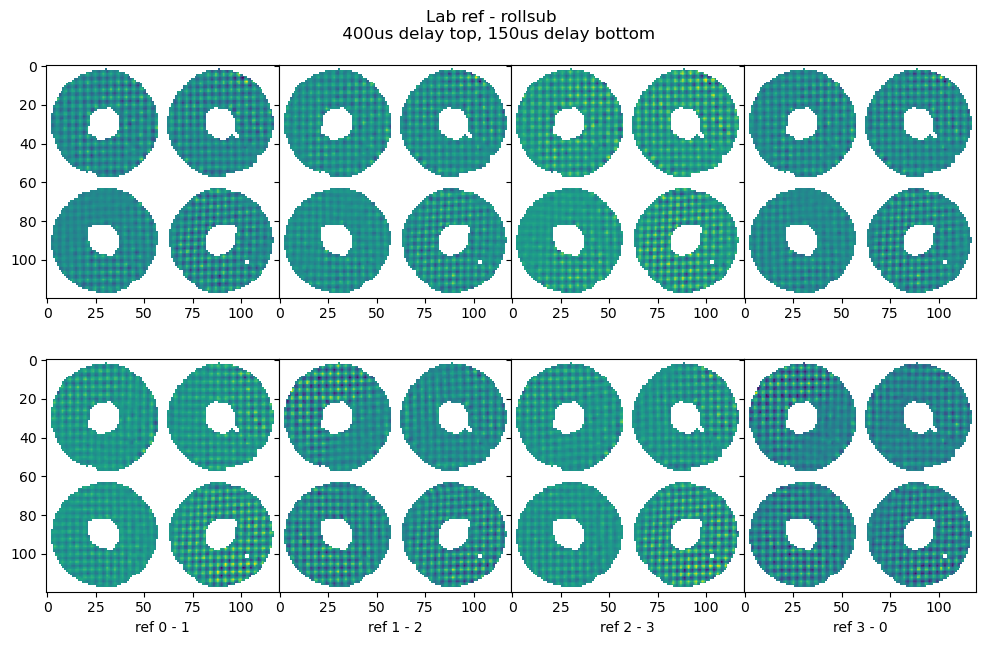

In [16]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,7), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test_1.mask_nan

for e in range(4):
    axs[0,e].imshow(X_lab_rs_M_1[e].reshape(120,120)*mask)

for e in range(4):
    axs[1,e].imshow(X_lab_rs_M_2[e].reshape(120,120)*mask)
    axs[1,e].set_xlabel(f"ref {e} - {(e+1)%4}")

plt.suptitle("Lab ref - rollsub  \n 400us delay top, 150us delay bottom", y=0.95)

plt.plot

[]

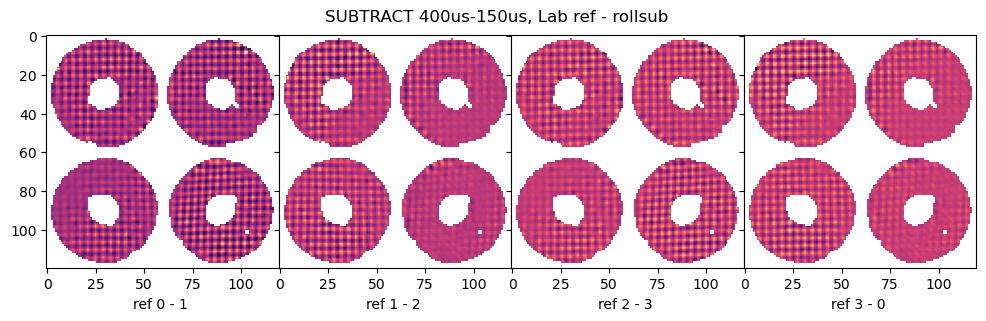

In [21]:
# orthogonalized subtracts
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test_1.mask_nan

for e in range(4):
    sub_mat = X_lab_rs_M_1[e] - X_lab_rs_M_2[e]
    axs[e].imshow(sub_mat.reshape(120,120)*mask, label = f'ref {e}', vmax = np.max(sub_mat), vmin = np.min(sub_mat), cmap = 'magma')
    axs[e].set_xlabel(f"ref {e} - {(e+1)%4} ")

plt.suptitle("SUBTRACT 400us-150us, Lab ref - rollsub", y=0.85)
plt.plot()

In [18]:
# now more othogonalizing
X_lab_rs_Q_1 = gram_schmidt_columns(X_lab_rs_M_1.T)
X_lab_rs_Q_2 = gram_schmidt_columns(X_lab_rs_M_2.T)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

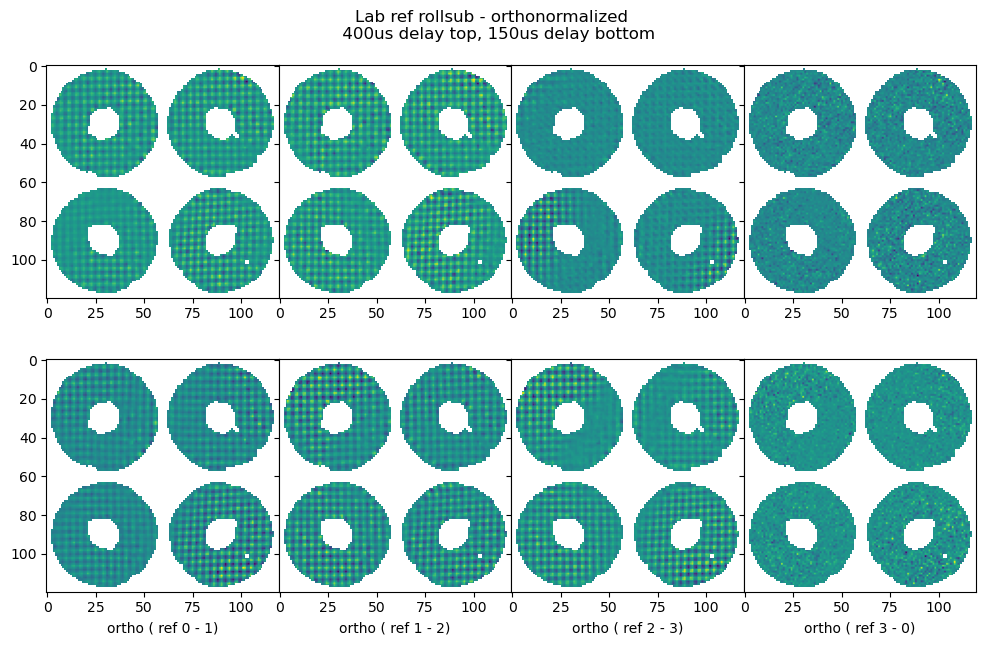

In [22]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,7), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test_1.mask_nan

for e in range(4):
    axs[0,e].imshow(X_lab_rs_Q_1[:, e].reshape(120,120)*mask)

for e in range(4):
    axs[1,e].imshow(X_lab_rs_Q_2[:, e].reshape(120,120)*mask)
    axs[1,e].set_xlabel(f"ortho ( ref {e} - {(e+1)%4})")

plt.suptitle("Lab ref rollsub - orthonormalized  \n 400us delay top, 150us delay bottom", y=0.95)

plt.plot

## What the heck, dot product this anyway

In [120]:
# want to pull a couple thousand to the "data" which in this case is just lab work
file_lists =  sx.gen_file_list(sx_test_1.lab_obs_span)
data, _ = sx_test_1.file_sample_n_clean(file_lists, n=5000, lab=True)

PULLING 5000 FILES
FILE no 10, n_start 0, n 5000, n_offset 0
XRIF index 0, no of files 10, len list 158
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7447855 bytes
  ratio:              0.505

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:       20480 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7448337 bytes
  ratio:              0.505

xrif compression details:
  difference method:  none
  reorder method:     none
  compress

In [121]:
X_ref = X_lab_Q_1.reshape(120,120, 4).T
X_ref.shape

(4, 120, 120)

In [122]:
dot_return = np.array([sx_test_1.dot_data_wo_ref(np.array(d), np.array(X_ref)) for d in data])

In [123]:
dot_return.shape

(5000, 4)

Text(0.5, 0.95, 'Lab results, orthonormalized, frames 0.125')

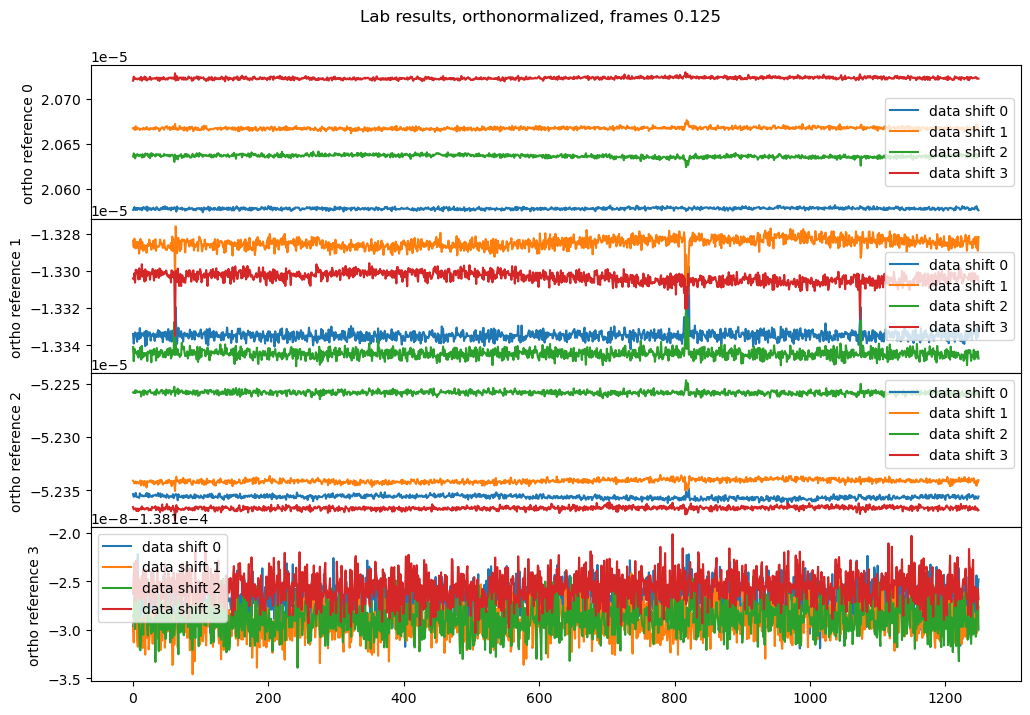

In [125]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12,8), facecolor='white', sharex=True)
fig.subplots_adjust(hspace=0)

for f in range(4):
    for e in range(4):
        axs[f].plot(dot_return[e::4, f], label = f"data shift {e}")
        axs[f].legend()
    axs[f].set_ylabel(f'ortho reference {f}')
    #axs[f].set_ylim(np.min(dot_return) -0.0001, np.max(dot_return)+0.0001)

plt.suptitle('Lab results, orthonormalized, frames 0.125',  y=0.95)


## " HAVE YOU TRIED SVD "

In [76]:
U, S, V = np.linalg.svd(X_lab_rs_M_1.T, full_matrices=True)
S

array([1.2872303e+00, 1.1560063e+00, 1.0033381e+00, 8.8282052e-04],
      dtype=float32)

In [77]:
U, S, V = np.linalg.svd(X_lab_M_1.T, full_matrices=True)
S

array([1.2872303e+00, 1.1560063e+00, 1.0033381e+00, 8.8282052e-04],
      dtype=float32)

# Orthogaonalizing sparkles

In [44]:
# TEST DATASET
'tweeterspeck_0.125frames'

# feq 1800 EM Gain 1 (?)
lab_dark = dark_dir + 'camwfs-dark_bin2_1800.000000_1.000000_-45.000000__T20240323005618680623195.fits'
#freq 1800 EM Gain 600
sky_dark = dark_dir + 'camwfs-dark_bin2_1800.000000_600.000000_-45.000000__T20240324234326026219038.fits'
sx_test = sx.SparkXrif('HD129590_2x2bin_iz_unsats', 'spark_LAB_1564_1800_25mod_15ld_02amp', sky_dark, lab_dark, sx.glob_dir_calib, sx.glob_mask, sx.glob_ref)
#sx_test_2 = sx.SparkXrif('tweeterspeck_0.125frames', 'tweeterspeck_0.125frames', sky_dark, lab_dark, sx.glob_dir_calib, sx.glob_mask, sx.glob_ref)

Number of DATA files:  539648
Number of REF files:  177664
GENERATING REFERENCE
PULLING 1024 FILES
FILE no 3, n_start 0, n 1024, n_offset 0
XRIF index 0, no of files 3, len list 347
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7442410 bytes
  ratio:              0.505

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:       20480 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7442257 bytes
  ratio:              0.505

xrif compres

In [9]:
# Pull a sample of files
x_unnorm = sx_test.file_sample_n_clean(sp_test.dir_data, 1000, norm=False)
x_lab_data = np.array([x_un[0] for x_un in x_unnorm]) #taking the data axis here

#reshape to get the 4 way split

PULLING 1000 FILES
FILE no 2, n_start 0, n 1000, n_offset 0
XRIF index 0, no of files 2, len list 158
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7447855 bytes
  ratio:              0.505

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:       20480 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7448337 bytes
  ratio:              0.505

xrif compression details:
  difference method:  none
  reorder method:     none
  compressio

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [40]:
x_lab_data = np.array(sx_test.labref_norm)
X_lab_M = x_lab_data.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

Text(0.5, 0.85, '5.17 Lab ref norm - normal reduction')

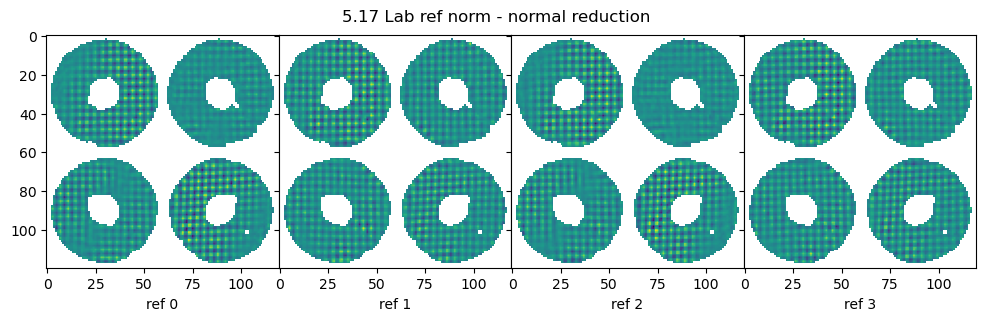

In [41]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test.mask_nan

for e in range(4):
    axs[e].imshow(X_lab_M[e].reshape(120,120)*mask, vmax = np.max(X_lab_M), vmin = np.min(X_lab_M))
    axs[e].set_xlabel(f"ref {e}")

plt.suptitle("5.17 Lab ref norm - normal reduction", y=0.85)

In [42]:
X_lab_Q = gram_schmidt_columns(X_lab_M.T)
X_lab_Q

array([[ 0.0000000e+00,  2.3102654e-16,  1.1752074e-16,  1.1121643e-13],
       [-0.0000000e+00,  0.0000000e+00,  8.2397876e-17,  1.0617045e-13],
       [-0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  8.1249460e-14],
       ...,
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00]],
      dtype=float32)

[]

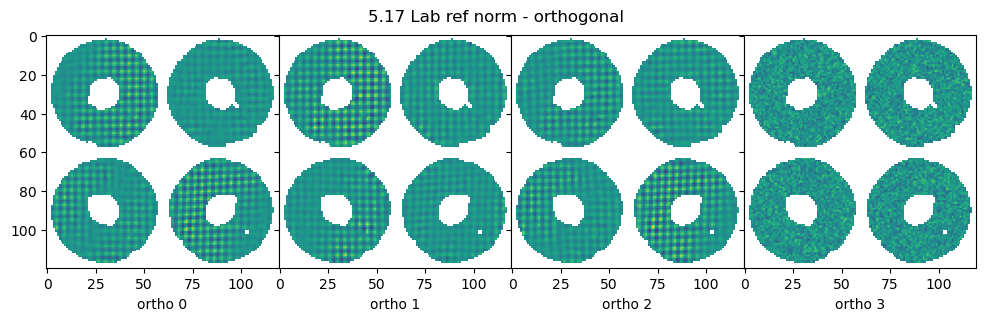

In [43]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test.mask_nan

for e in range(4):
    axs[e].imshow(X_lab_Q[:, e].reshape(120,120)*mask, vmax = np.max(X_lab_Q), vmin = np.min(X_lab_Q))
    axs[e].set_xlabel(f"ortho {e}")

plt.suptitle("5.17 Lab ref norm - orthogonal", y=0.85)
plt.plot()

[]

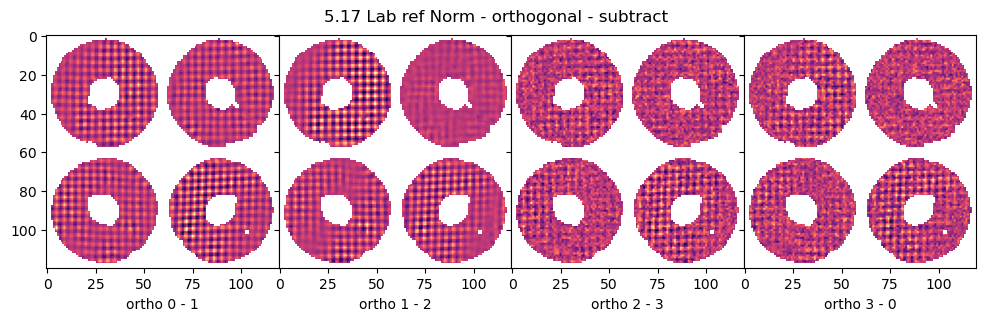

In [22]:
# orthonormal subtracts

# checking the lab reference: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test.mask_nan

for e in range(4):
    sub_mat = X_lab_Q[:, e] - X_lab_Q[:, (e+1)%4]
    axs[e].imshow(sub_mat.reshape(120,120)*mask, label = f'ref {e}', vmax = np.max(X_lab_Q), vmin = np.min(X_lab_Q), cmap = 'magma')
    axs[e].set_xlabel(f"ortho {e} - {(e+1)%4}")

plt.suptitle("5.17 Lab ref Norm - orthogonal - subtract", y=0.85)
plt.plot()

## try again with rollsub

In [69]:
x_lab_data = np.array(sx_test.labref_rollsub)
X_lab_M = x_lab_data.reshape((4, 120*120)) # reshaping to make easier to orthogonalize

In [70]:
X_lab_Q = gram_schmidt_columns(X_lab_M.T)
X_lab_Q 

array([[ 0.0000000e+00,  1.5086673e-16,  1.4791059e-16,  7.3947465e-01],
       [-0.0000000e+00,  0.0000000e+00,  2.7742216e-16,  4.3257609e-01],
       [-0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -3.9117524e-01],
       ...,
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00]],
      dtype=float32)

Text(0.5, 0.85, 'Lab ref ROLLSUB reduction')

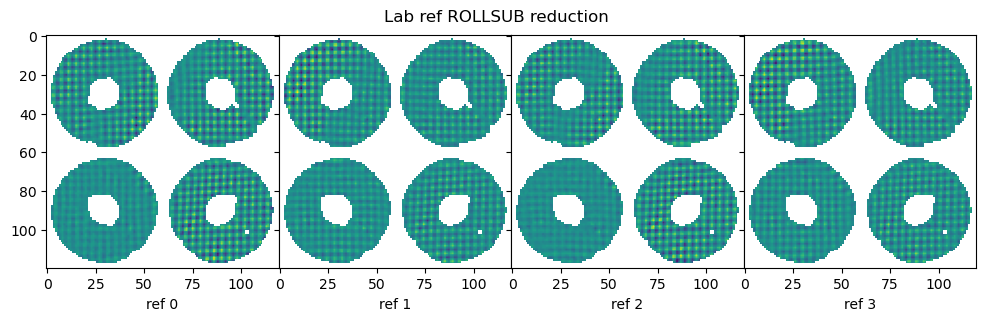

In [71]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test.mask_nan

for e in range(4):
    axs[e].imshow(X_lab_M[e].reshape(120,120)*mask, label = f'ref {e}', vmax = np.max(X_lab_M), vmin = np.min(X_lab_M))
    axs[e].set_xlabel(f"ref {e}")

plt.suptitle("Lab ref ROLLSUB reduction", y=0.85)

[]

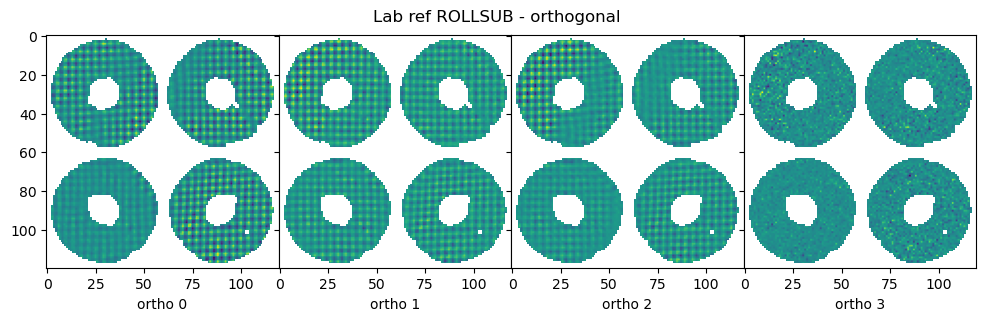

In [73]:
# checking the lab reference: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test.mask_nan

for e in range(4):
    axs[e].imshow(X_lab_Q[:, e].reshape(120,120)*mask, label = f'ref {e}', )
    axs[e].set_xlabel(f"ortho {e}")

plt.suptitle("Lab ref ROLLSUB - orthogonal", y=0.85)
plt.plot()

[]

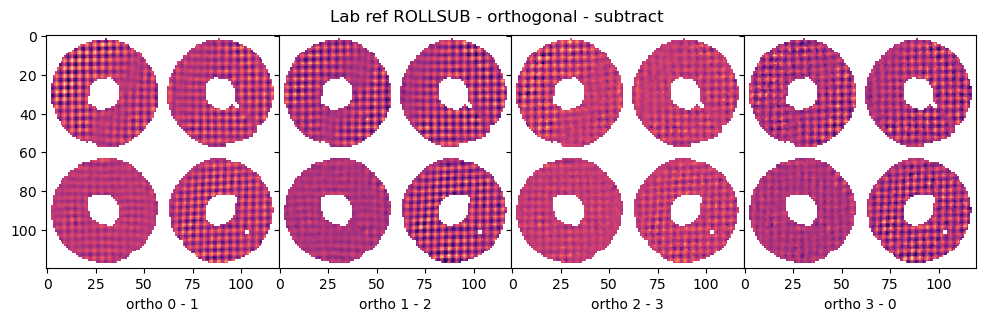

In [75]:
# orthonormal subtracts

# checking the lab reference: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)

mask = sx_test.mask_nan

for e in range(4):
    sub_mat = X_lab_Q[:, e] - X_lab_Q[:, (e+1)%4]
    axs[e].imshow(sub_mat.reshape(120,120)*mask, label = f'ref {e}', cmap = 'magma')
    axs[e].set_xlabel(f"ortho {e} - {(e+1)%4}")

plt.suptitle("Lab ref ROLLSUB - orthogonal - subtract", y=0.85)
plt.plot()

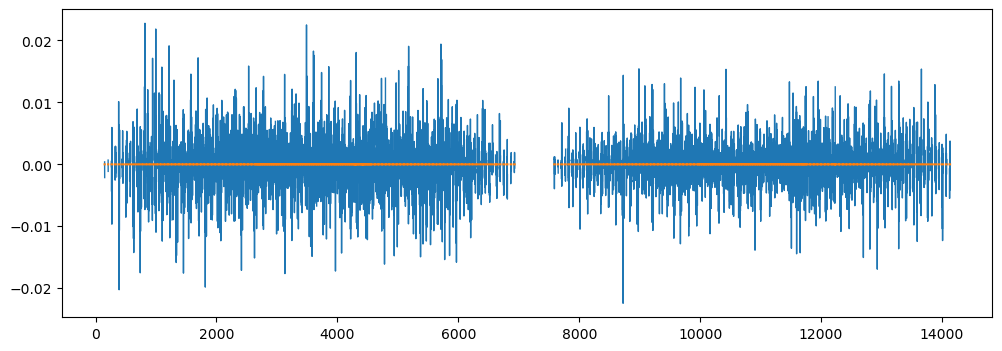

In [86]:
fig, axs = plt.subplots(figsize=(12,4), facecolor='white', sharey=True)

plt.plot(X_lab_Q[:, e]*mask.reshape(120*120), lw=1)
plt.plot(X_lab_M[e]*mask.reshape(120*120))